# Import

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split

# Load data

In [2]:
df = pd.read_csv("imdb_data.csv")
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [3]:
df.isna().sum()

id                 0
primaryTitle       0
originalTitle      0
isAdult            0
runtimeMinutes     0
genres             0
averageRating      0
numVotes           0
budget             0
gross             51
release_date       5
directors          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


# Prepare data

In [5]:
df.set_index('id', inplace=True)
df = df.dropna()

In [6]:
df.duplicated().sum()

0

In [7]:
(df['primaryTitle'] == df['originalTitle']).value_counts()


True     3148
False     144
dtype: int64

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])


In [9]:
df['genres'].nunique()

286

In [10]:
df['genres'].value_counts()[:10]

Action,Adventure,Sci-Fi       127
Comedy,Drama,Romance          121
Adventure,Animation,Comedy    110
Comedy                        101
Action,Adventure,Comedy        98
Action,Crime,Drama             90
Comedy,Romance                 86
Action,Crime,Thriller          84
Action,Adventure,Fantasy       82
Comedy,Drama                   75
Name: genres, dtype: int64

In [11]:
df.head()

,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
id,,,,,,,,,,,
tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold
tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,1970-12-11,Wolfgang Reitherman
tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1970-01-01,Brian G. Hutton
tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1970-01-25,Robert Altman
tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,1970-02-04,Franklin J. Schaffner


<Axes: >

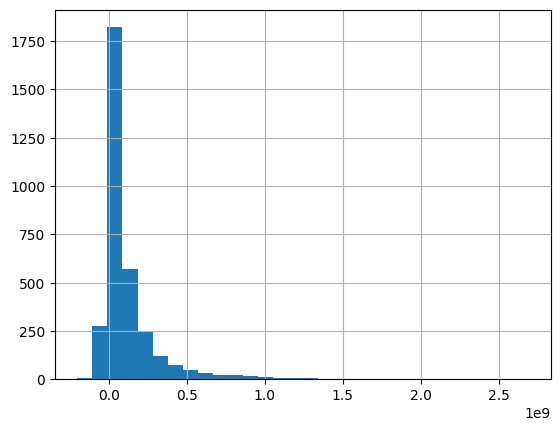

In [12]:
df['net_profit'] = df['gross'] - df['budget']
df['net_profit'].hist(bins=30)

In [13]:
genres = df['genres'].str.get_dummies(sep = ',')
genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
tt0035423,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
tt0065421,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0065938,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
tt0066026,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
tt0066206,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9770150,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
tt9777666,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
tt9784798,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
sub = pd.DataFrame()
sub[['originalTitle', 'net_profit']] = df[['originalTitle', 'net_profit']].copy()

sub.set_index(df.index)
sub = pd.concat([sub, genres], axis=1)
sub

,originalTitle,net_profit,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
tt0035423,Kate & Leopold,28019048.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
tt0065421,The AristoCats,31459543.0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0065938,Kelly's Heroes,1200000.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
tt0066026,M*A*S*H,78100000.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
tt0066206,Patton,49749765.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9770150,Nomadland,34458207.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
tt9777666,The Tomorrow War,-185600000.0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
tt9784798,Judas and the Black Messiah,-18521991.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
sub_corr = sub.drop('originalTitle',axis = 1).corr()
sub_corr['net_profit'].abs().sort_values(ascending = False)

net_profit     1.000000
Adventure      0.340048
Animation      0.203106
Drama          0.188488
Action         0.147681
Crime          0.121994
Sci-Fi         0.094574
Horror         0.093221
Fantasy        0.088629
Family         0.079473
Mystery        0.077573
Biography      0.073667
Romance        0.063131
Thriller       0.057511
Sport          0.047030
History        0.042543
War            0.031634
Comedy         0.019159
Music          0.018445
Documentary    0.015044
Western        0.011974
News           0.005942
Musical        0.003569
Name: net_profit, dtype: float64

In [17]:
important_genres = sub_corr['net_profit'].abs().round(2).sort_values(ascending = False)[1:6].index
important_genres

Index(['Adventure', 'Animation', 'Drama', 'Action', 'Crime'], dtype='object')

In [18]:
sub_corr['net_profit'].abs().round(2).sort_values(ascending = False)

net_profit     1.00
Adventure      0.34
Animation      0.20
Drama          0.19
Action         0.15
Crime          0.12
Fantasy        0.09
Horror         0.09
Sci-Fi         0.09
Mystery        0.08
Family         0.08
Biography      0.07
Thriller       0.06
Romance        0.06
Sport          0.05
History        0.04
War            0.03
Music          0.02
Documentary    0.02
Comedy         0.02
News           0.01
Western        0.01
Musical        0.00
Name: net_profit, dtype: float64

In [19]:
df = df[['isAdult', 'runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross', 'release_date', 'net_profit', 'directors']]
df.head()

,isAdult,runtimeMinutes,averageRating,numVotes,budget,gross,release_date,net_profit,directors
id,,,,,,,,,
tt0035423,0,118,6.4,87925,48000000,76019048.0,2001-12-11,28019048.0,James Mangold
tt0065421,0,78,7.1,111758,4000000,35459543.0,1970-12-11,31459543.0,Wolfgang Reitherman
tt0065938,0,144,7.6,52628,4000000,5200000.0,1970-01-01,1200000.0,Brian G. Hutton
tt0066026,0,116,7.4,75784,3500000,81600000.0,1970-01-25,78100000.0,Robert Altman
tt0066206,0,172,7.9,106476,12000000,61749765.0,1970-02-04,49749765.0,Franklin J. Schaffner


In [20]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

/tmp/ipykernel_7782/871126998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_year'] = df['release_date'].dt.year
/tmp/ipykernel_7782/871126998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_month'] = df['release_date'].dt.month


In [21]:
df = df.drop('release_date', axis = 1)

df = pd.concat([df, genres[important_genres]], axis=1)
df.head()

,isAdult,runtimeMinutes,averageRating,numVotes,budget,gross,net_profit,directors,release_year,release_month,release_day,Adventure,Animation,Drama,Action,Crime
id,,,,,,,,,,,,,,,,
tt0035423,0,118,6.4,87925,48000000,76019048.0,28019048.0,James Mangold,2001,12,11,0,0,0,0,0
tt0065421,0,78,7.1,111758,4000000,35459543.0,31459543.0,Wolfgang Reitherman,1970,12,11,1,1,0,0,0
tt0065938,0,144,7.6,52628,4000000,5200000.0,1200000.0,Brian G. Hutton,1970,1,1,1,0,0,0,0
tt0066026,0,116,7.4,75784,3500000,81600000.0,78100000.0,Robert Altman,1970,1,25,0,0,1,0,0
tt0066206,0,172,7.9,106476,12000000,61749765.0,49749765.0,Franklin J. Schaffner,1970,2,4,0,0,1,0,0


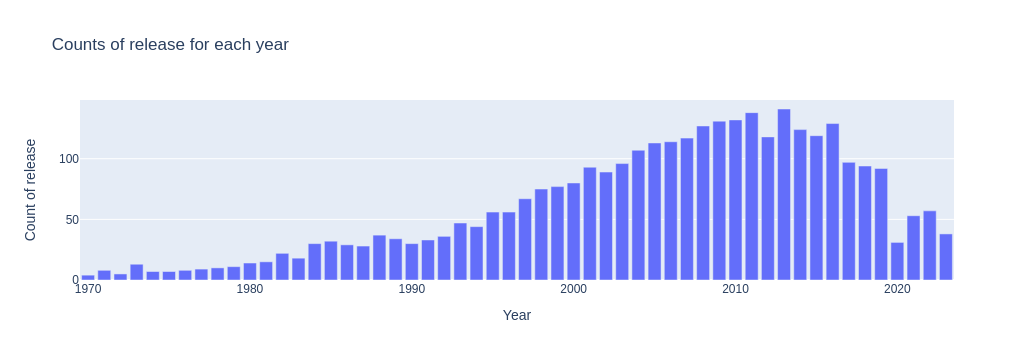

In [24]:
counts_per_year = df['release_year'].value_counts().sort_index().reset_index()
counts_per_year.columns = ['Year', 'Count']

fig = px.bar(counts_per_year, x='Year', y='Count', 
             labels={'Year': 'Year', 'Count': 'Count of release'},
             title='Counts of release for each year')
fig.show()

In [25]:
df['release_month'].value_counts()

9     419
5     337
1     335
12    332
6     292
7     266
3     249
11    233
8     233
10    224
2     187
4     185
Name: release_month, dtype: int64

In [26]:
df['release_day'].value_counts()

1     236
19    140
11    138
10    132
12    131
9     129
7     129
16    128
13    128
8     122
20    118
22    110
18    108
4     104
25    104
17    102
6     102
14     95
23     91
26     91
15     88
3      88
21     87
2      86
24     85
27     83
5      78
30     75
29     72
28     63
31     49
Name: release_day, dtype: int64

In [27]:
directors = df['directors'].str.get_dummies(sep=',').add_prefix('Director_')
directors

,Director_ Aaron Seltzer,Director_ Adam Nee,Director_ Adrian Molina,Director_ Alan Mak,Director_ Albert Magnoli,Director_ Alec Berg,Director_ Alexandre Rockwell,Director_ Allen Hughes,Director_ Andrew Stanton,Director_ Angus MacLane,...,Director_Xavier Gens,Director_Yarrow Cheney,Director_Yash Chopra,Director_Yimou Zhang,Director_Yorgos Lanthimos,Director_Zach Braff,Director_Zach Cregger,Director_Zack Snyder,Director_Zal Batmanglij,Director_Ömer Faruk Sorak
id,,,,,,,,,,,,,,,,,,,,,
tt0035423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0065421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0065938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0066026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt0066206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9770150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt9777666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tt9784798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
director_corr = pd.concat([df['net_profit'], directors], axis=1).corr()
important_directors = director_corr['net_profit'].abs().sort_values(ascending = False)[1:15].index
important_directors

Index(['Director_James Cameron', 'Director_ Joe Russo',
       'Director_Anthony Russo', 'Director_Jon Watts',
       'Director_ Jennifer Lee', 'Director_Chris Buck',
       'Director_Pierre Coffin', 'Director_David Yates',
       'Director_Peter Jackson', 'Director_Joss Whedon',
       'Director_J.J. Abrams', 'Director_Colin Trevorrow',
       'Director_ Pierre Leduc', 'Director_ Michael Jelenic'],
      dtype='object')

In [29]:
director_corr['net_profit'].abs().sort_values(ascending = False).head(15)

net_profit                   1.000000
Director_James Cameron       0.201661
Director_ Joe Russo          0.184895
Director_Anthony Russo       0.184895
Director_Jon Watts           0.150327
Director_ Jennifer Lee       0.136137
Director_Chris Buck          0.136137
Director_Pierre Coffin       0.127427
Director_David Yates         0.123200
Director_Peter Jackson       0.105363
Director_Joss Whedon         0.103833
Director_J.J. Abrams         0.101024
Director_Colin Trevorrow     0.099153
Director_ Pierre Leduc       0.097793
Director_ Michael Jelenic    0.097793
Name: net_profit, dtype: float64

In [30]:
df = pd.concat([df, directors[important_directors]], axis=1)
df = df.drop('directors', axis = 1)

df

,isAdult,runtimeMinutes,averageRating,numVotes,budget,gross,net_profit,release_year,release_month,release_day,...,Director_ Jennifer Lee,Director_Chris Buck,Director_Pierre Coffin,Director_David Yates,Director_Peter Jackson,Director_Joss Whedon,Director_J.J. Abrams,Director_Colin Trevorrow,Director_ Pierre Leduc,Director_ Michael Jelenic
id,,,,,,,,,,,,,,,,,,,,,
tt0035423,0,118,6.4,87925,48000000,76019048.0,28019048.0,2001,12,11,...,0,0,0,0,0,0,0,0,0,0
tt0065421,0,78,7.1,111758,4000000,35459543.0,31459543.0,1970,12,11,...,0,0,0,0,0,0,0,0,0,0
tt0065938,0,144,7.6,52628,4000000,5200000.0,1200000.0,1970,1,1,...,0,0,0,0,0,0,0,0,0,0
tt0066026,0,116,7.4,75784,3500000,81600000.0,78100000.0,1970,1,25,...,0,0,0,0,0,0,0,0,0,0
tt0066206,0,172,7.9,106476,12000000,61749765.0,49749765.0,1970,2,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9770150,0,107,7.3,175977,5000000,39458207.0,34458207.0,2020,9,11,...,0,0,0,0,0,0,0,0,0,0
tt9777666,0,138,6.6,220617,200000000,14400000.0,-185600000.0,2021,6,30,...,0,0,0,0,0,0,0,0,0,0
tt9784798,0,126,7.4,88568,26000000,7478009.0,-18521991.0,2021,2,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.columns

Index(['isAdult', 'runtimeMinutes', 'averageRating', 'numVotes', 'budget',
       'gross', 'net_profit', 'release_year', 'release_month', 'release_day',
       'Adventure', 'Animation', 'Drama', 'Action', 'Crime',
       'Director_James Cameron', 'Director_ Joe Russo',
       'Director_Anthony Russo', 'Director_Jon Watts',
       'Director_ Jennifer Lee', 'Director_Chris Buck',
       'Director_Pierre Coffin', 'Director_David Yates',
       'Director_Peter Jackson', 'Director_Joss Whedon',
       'Director_J.J. Abrams', 'Director_Colin Trevorrow',
       'Director_ Pierre Leduc', 'Director_ Michael Jelenic'],
      dtype='object')

In [32]:
features_list = df.columns.tolist()
target = 'net_profit'
features_list.remove(target)
features_list.remove('gross')

In [33]:
features_list

['isAdult',
 'runtimeMinutes',
 'averageRating',
 'numVotes',
 'budget',
 'release_year',
 'release_month',
 'release_day',
 'Adventure',
 'Animation',
 'Drama',
 'Action',
 'Crime',
 'Director_James Cameron',
 'Director_ Joe Russo',
 'Director_Anthony Russo',
 'Director_Jon Watts',
 'Director_ Jennifer Lee',
 'Director_Chris Buck',
 'Director_Pierre Coffin',
 'Director_David Yates',
 'Director_Peter Jackson',
 'Director_Joss Whedon',
 'Director_J.J. Abrams',
 'Director_Colin Trevorrow',
 'Director_ Pierre Leduc',
 'Director_ Michael Jelenic']

In [34]:
df.describe()

,isAdult,runtimeMinutes,averageRating,numVotes,budget,gross,net_profit,release_year,release_month,release_day,...,Director_ Jennifer Lee,Director_Chris Buck,Director_Pierre Coffin,Director_David Yates,Director_Peter Jackson,Director_Joss Whedon,Director_J.J. Abrams,Director_Colin Trevorrow,Director_ Pierre Leduc,Director_ Michael Jelenic
count,3292.0,3292.000000,3292.000000,3.292000e+03,3.292000e+03,3.292000e+03,3.292000e+03,3292.000000,3292.000000,3292.000000,...,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000,3292.000000
mean,0.0,112.733597,6.741403,2.170898e+05,5.046317e+07,1.682646e+08,1.178014e+08,2005.345383,6.657655,14.522479,...,0.000608,0.000608,0.000911,0.002430,0.003341,0.000911,0.001823,0.000911,0.000304,0.000304
std,0.0,19.810446,0.881473,2.494723e+05,5.179130e+07,2.367528e+08,2.039864e+08,10.961998,3.468449,8.592877,...,0.024644,0.024644,0.030179,0.049244,0.057717,0.030179,0.042659,0.030179,0.017429,0.017429
min,0.0,63.000000,1.000000,5.000400e+04,1.800000e+01,2.100000e+02,-1.998219e+08,1970.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,98.000000,6.200000,7.939600e+04,1.500000e+07,3.628330e+07,1.146571e+07,1999.000000,4.000000,7.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,109.000000,6.800000,1.297150e+05,3.200000e+07,8.843429e+07,5.091434e+07,2007.000000,7.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,124.000000,7.300000,2.490032e+05,6.800000e+07,2.009951e+08,1.409485e+08,2014.000000,9.000000,21.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,229.000000,9.300000,2.817283e+06,3.560000e+08,2.923706e+09,2.686706e+09,2023.000000,12.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [36]:
df_train.shape, df_test.shape

((2633, 29), (659, 29))

# Train a first model

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [38]:
dtrain = xgb.DMatrix(df_train[features_list], label=df_train[target])
dtest = xgb.DMatrix(df_test[features_list], label=df_test[target])

In [39]:
param = {'max_depth': 4, 'alpha': 0.01}

In [40]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]

In [41]:
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist)

/home/tveran/miniconda3/envs/imdb/lib/python3.9/site-packages/xgboost/core.py:727: FutureWarning:

Pass `evals` as keyword args.



[0]	train-rmse:170586495.14254	eval-rmse:180722258.64159
[1]	train-rmse:148917438.49227	eval-rmse:165948412.96292
[2]	train-rmse:135494831.81108	eval-rmse:159109560.15947
[3]	train-rmse:125055336.01934	eval-rmse:147800816.78662
[4]	train-rmse:118661269.60187	eval-rmse:144128559.92914
[5]	train-rmse:113544235.70043	eval-rmse:141702311.38636
[6]	train-rmse:110101915.97631	eval-rmse:140566673.42705
[7]	train-rmse:106531027.99121	eval-rmse:142353496.64609
[8]	train-rmse:104566755.42647	eval-rmse:139921151.43390
[9]	train-rmse:102448005.50342	eval-rmse:139194782.08616
[10]	train-rmse:101126532.44524	eval-rmse:139037860.17033
[11]	train-rmse:98950734.31954	eval-rmse:136945771.18625
[12]	train-rmse:97126083.01919	eval-rmse:136221148.68408
[13]	train-rmse:95243076.84720	eval-rmse:135617042.87394
[14]	train-rmse:93715344.51142	eval-rmse:134038758.11541
[15]	train-rmse:93370996.61601	eval-rmse:133683729.87895
[16]	train-rmse:91836572.72646	eval-rmse:133590374.67085
[17]	train-rmse:90250001.45346

In [42]:
bst.save_model('xgb-01.model')

/home/tveran/miniconda3/envs/imdb/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning:

[19:20:13] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



# Evaluate

In [43]:
df_test[target + '_pred'] = bst.predict(dtest)

<Axes: >

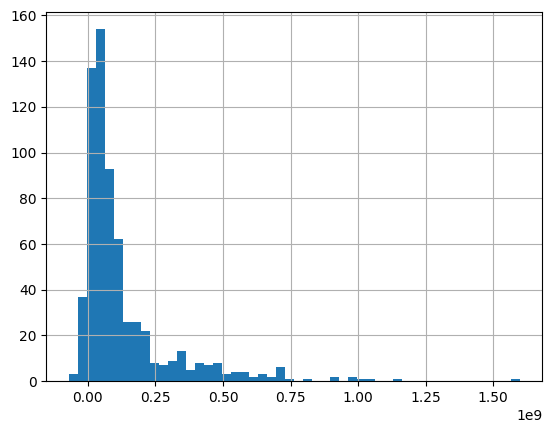

In [44]:
df_test[target + '_pred'].hist(bins=50)

In [46]:
def compute_rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

compute_rmse(df_test[target], df_test[target + '_pred'])

123895213.151808

# Analyze

## Feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

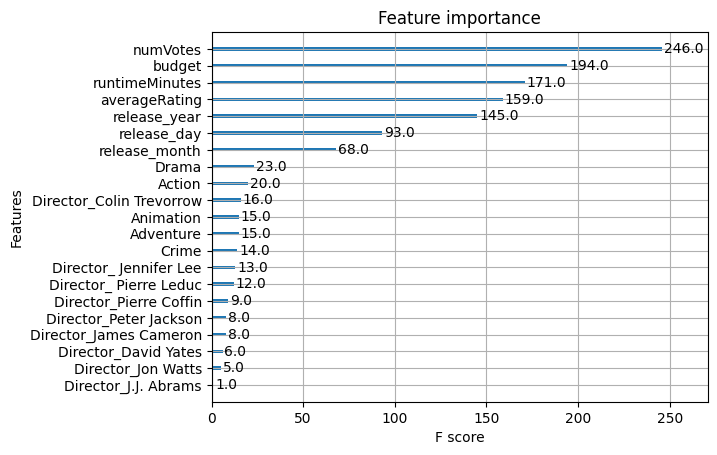

In [47]:
xgb.plot_importance(bst)


## SHAP

In [52]:
import shap

shap.initjs()

In [50]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(df_train[features_list])

In [53]:
shap.force_plot(explainer.expected_value, shap_values[0, :], df_train[features_list].iloc[0, :])

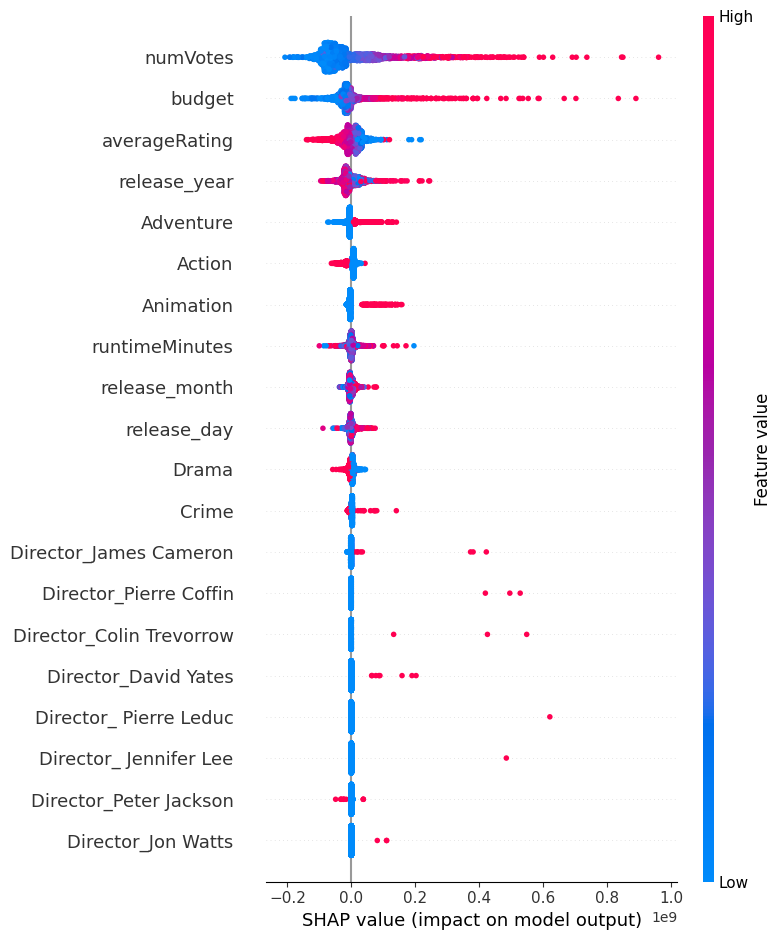

In [54]:
shap.summary_plot(shap_values, df_train[features_list])

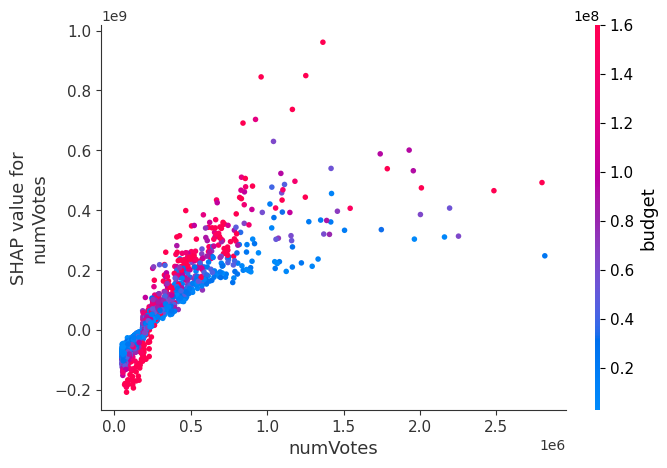

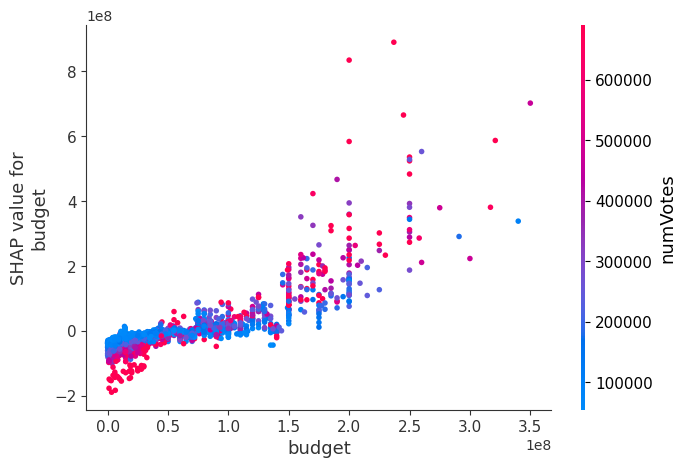

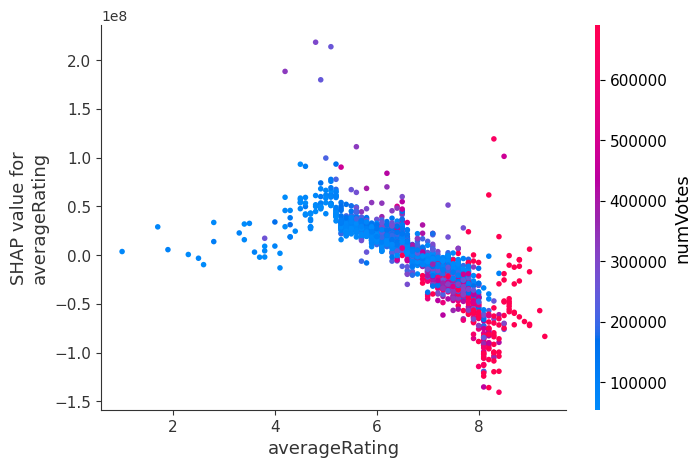

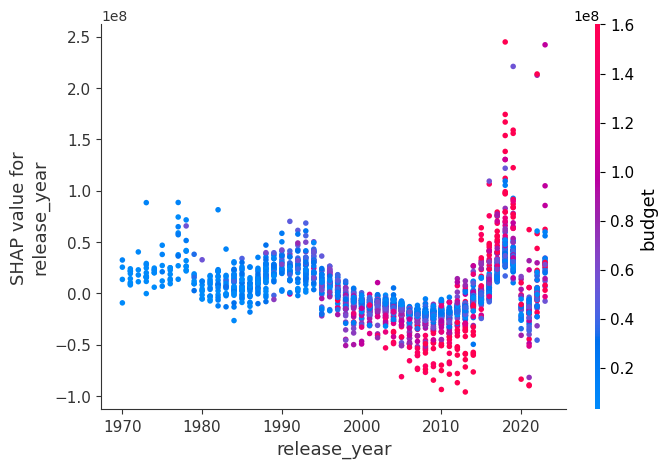

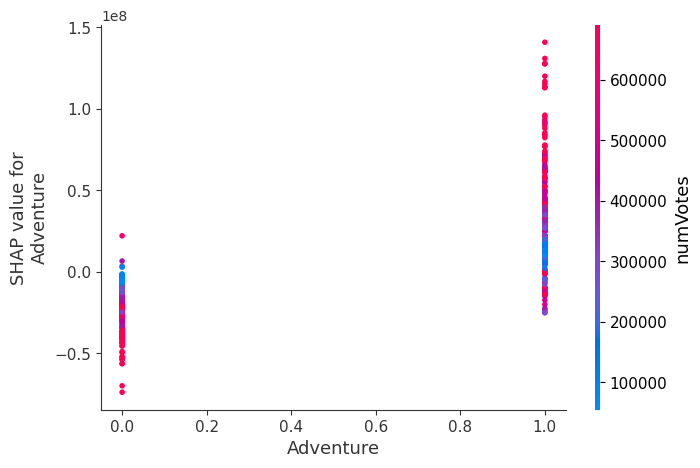

In [58]:
top_indices = np.argsort(-np.sum(np.abs(shap_values), 0))

for i in range(5):
    shap.dependence_plot(top_indices[i], shap_values, df_train[features_list])